# Introduction

I dived deep into all LEGO datasets. The following questiions were treated:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces.

<img src="assets/bricks.jpg">

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

<h5> How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours</h5>.

In [2]:
df = pd.read_csv(r"C:\Users\personal\Downloads\LEGO+Notebook+and+Data+(start)\LEGO Notebook and Data (start)\data\colors.csv")


In [3]:
df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [4]:
df.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [5]:
df.nunique()['rgb']

124

<h5>Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>.</h5>

In [6]:
df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


<h5> Alternatively </h5>

In [7]:
df['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

<h3>Understanding LEGO Themes and LEGO Sets</h3>

<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src = 'https://i.imgur.com/whB1olq.png'>

<h5>I read the 'sets.csv' data and took a look at the first and last couple of rows.</h5> 

In [8]:
df_sets = pd.read_csv(r'C:\Users\personal\Downloads\LEGO+Notebook+and+Data+(start)\LEGO Notebook and Data (start)\data\sets.csv')

In [9]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [10]:
df_sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


<h5> In which year were the first LEGO sets released and what were these sets called?</h5>

In [11]:
df_sets.sort_values('year').head()[['name', 'year']]

,name,year
9521,Extra-Large Gift Set (ABB),1949
9534,Large Gift Set (ABB),1949
9539,Medium Gift Set (ABB),1949
9544,Small Brick Set (ABB),1949
9545,Small Doors and Windows Set (ABB),1949


<h5>How many different sets did LEGO sell in their first year?</h5>
<h5>How many types of LEGO products were on offer in the year the company started?</h5>

In [12]:
df_sets[df_sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


##### How many types of LEGO products were on offer in the year the company started?

In [13]:
df_sets[df_sets['year'] == 1949]['name'].nunique()

5

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [14]:
df_sets.sort_values('num_parts', ascending=False).head()


,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


<h5>Show the number of LEGO sets released year-on-year.</h5> 
<h5>How do the number of sets released in 1955 compare to the number of sets released in 2019?</h5> 

In [15]:
set_by_year = df_sets.groupby('year').count()
set_by_year.head()['set_num']

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [16]:
set_by_year.tail()['set_num']

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

<h5>Show the number of LEGO releases on a line chart using Matplotlib.</h5> 
<br>
The csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart.<br>

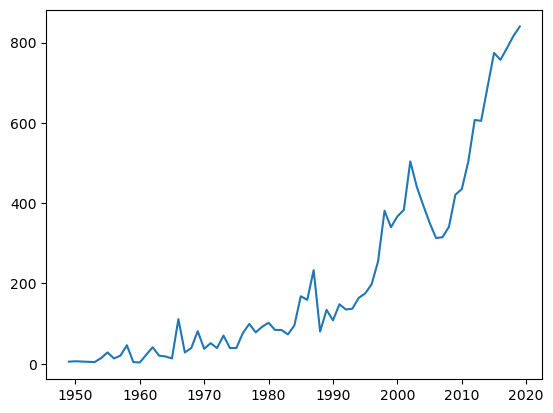

In [17]:
plt.plot(set_by_year.index[:-2], set_by_year.set_num[:-2])

<h5>Find out the number of different themes shipped by year.</h5>

In [18]:
theme_by_year = df_sets.groupby('year').agg({'theme_id': pd.Series.nunique})


In [19]:
theme_by_year.rename(columns = {'theme_id': 'nr_themes'}, inplace=True)
theme_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [20]:
theme_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


<h5>Plotted the grph of number of themes released by year on a line chart. Only included the full calendar years. 2020 and 2021 excluded.</h5>

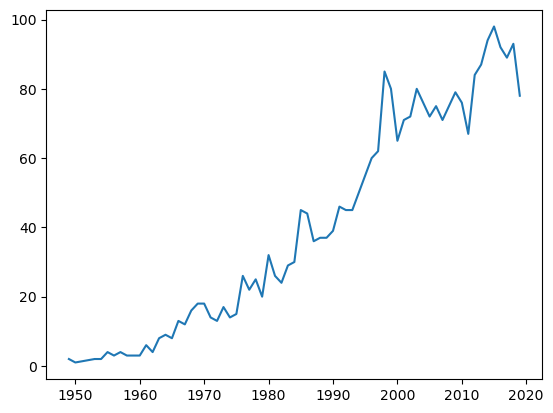

In [21]:
plt.plot(theme_by_year[:-2])

<h5> Graph consist Number of Sets and Number of Themes</h5>

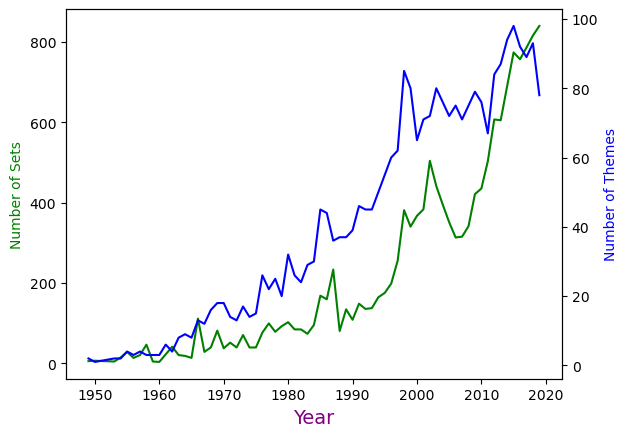

In [22]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel('Year', color='purple', fontsize=14)
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')
ax1.plot(set_by_year.set_num[:-2], color='g')
ax2.plot(theme_by_year[:-2], color='b')

<h5>Find the average number of parts per set.</h5>
<h5>How many parts did the average LEGO set released in 1954 compared to say, 2017?</h5>

In [23]:
parts_per_set = df_sets.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.rename(columns={'num_parts': 'average num_part'}, inplace=True)
parts_per_set.head()

,average num_part
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [24]:
parts_per_set.tail()

,average num_part
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


### Scatter Plots in Matplotlib

<h5>Plotted the average number of parts over time.</h5>

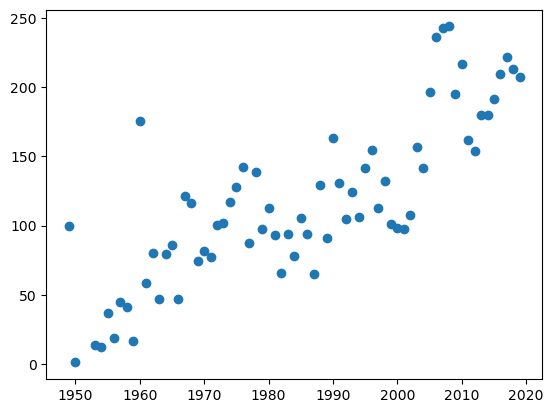

In [25]:
h1 = plt.scatter(parts_per_set.index[:-2], parts_per_set['average num_part'][:-2])
h1

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

### View the Database schema
<img src = 'https://i.imgur.com/Sg4lcjx.png'>

### The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

<h5>Searched for the name 'Star Wars'. 
How many <code>id</code>s correspond to this name in the themes.csv? Then used <code>id</code>s and find the corresponding the sets in the sets.csv</h5>

In [26]:
df_themes = pd.read_csv(r"C:\Users\personal\Downloads\LEGO+Notebook+and+Data+(start)\LEGO Notebook and Data (start)\data\themes.csv")
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [27]:
df_themes[df_themes['name'] == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [28]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [41]:
df_sets[df_sets['theme_id'] == 18].sort_values("num_parts", ascending=False)


,set_num,name,year,theme_id,num_parts
12066,8002-1,Destroyer Droid,2000,18,567
12081,8011-1,Jango Fett,2002,18,425
12074,8010-1,Darth Vader,2002,18,388
12083,8012-1,Super Battle Droid,2002,18,378
12072,8008-1,Stormtrooper,2001,18,360
12071,8007-1,C-3PO,2001,18,339
12058,8001-1,Battle Droid,2000,18,336
12073,8009-1,R2-D2,2002,18,239
12051,8000-1,Pit Droid,2000,18,223
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1


In [40]:
df_sets[df_sets['theme_id'] == 158].sort_values("num_parts", ascending=False)

,set_num,name,year,theme_id,num_parts
15612,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,158,5462
11216,75222-1,Betrayal at Cloud City,2018,158,2810
11244,75244-1,Tantive IV,2019,158,1772
11256,75255-1,Yoda,2019,158,1771
11180,75190-1,First Order Star Destroyer,2017,158,1416
...,...,...,...,...,...
6429,5001307-1,Buildable Galaxy Collection II,2012,158,0
9164,66542-1,Star Wars Microfighters Super Pack 3 in 1,2016,158,0
9165,66543-1,Microfighters Super Pack 3 in 1,2016,158,0
9170,66555-1,Rogue One Trooper Super Pack,2017,158,0


In [42]:
df_sets[df_sets['theme_id'] == 209].sort_values("num_parts", ascending=False)

,set_num,name,year,theme_id,num_parts
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [36]:
df_sets[df_sets['theme_id'] == 261]

,set_num,name,year,theme_id,num_parts
14630,9748-1,Droid Developer Kit,1999,261,658
14636,9754-1,Dark Side Developers Kit,2000,261,578


In [44]:
set_theme_counts = df_sets['theme_id'].value_counts()
set_theme_counts[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64


### Convert the series into a dataframe

In [45]:
set_theme_count = pd.DataFrame({'id':set_theme_counts.index,
                               'id_theme_count': set_theme_counts.values})
set_theme_count.head()

,id,id_theme_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


### Merging  DataFrames

In [46]:
merged_df = pd.merge(set_theme_count, df_themes, on='id')
merged_df.head()

,id,id_theme_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


### Bar Graph to visualize the data of names of products against theme counts

<BarContainer object of 10 artists>

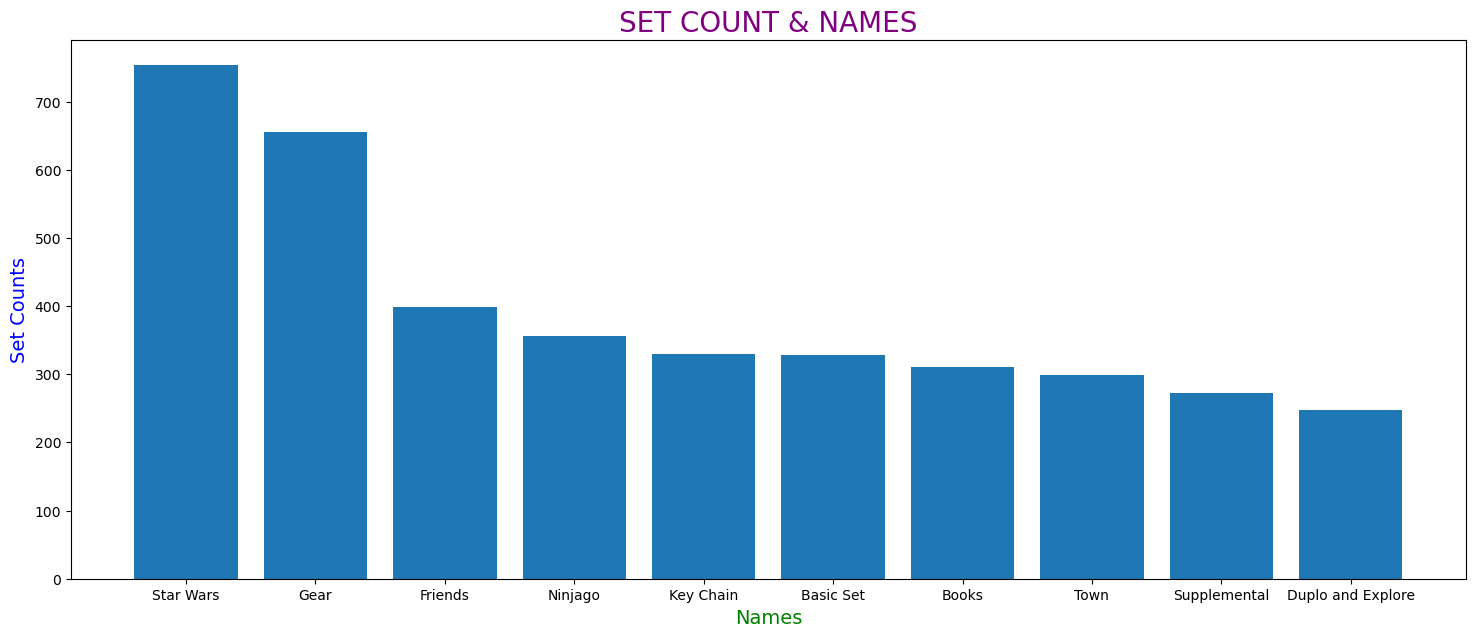

In [58]:
plt.figure(figsize=(18,7))
plt.xlabel("Names", fontsize = 14, color='green')
plt.ylabel("Set Counts", fontsize = 14, color='blue')
plt.title("SET COUNT & NAMES", color='purple', fontsize=20)
plt.bar(merged_df.name[:10], merged_df.id_theme_count[:10])